### Здесь те задачи и их моё решение, которые мне показались интересными

Вы получили доступ к одной из камер наблюдения в особо секретной огранизации. В зоне видимости камеры находится табло, с которого вы постоянно считываете информацию. Теперь вам нужно написать программу, которая по состоянию табло определяет, какая буква изображена на нём в данный момент. Табло представляет из себя квадратную таблицу, разбитую на n×n равных квадратных светодиодов. Каждый диод либо включён, либо выключен. Введём систему координат, направив ось OX вправо, а ось OY — вверх, приняв сторону диода равной 1.
(x,y)
На табло могут быть изображены только следующие буквы:
- I — прямоугольник из горящих диодов.
- O — прямоугольник из горящих диодов с углами (x1,y1) и (x2,y2), внутри которого есть прямоугольник из выключенных диодов с координатами углов (x3,y3) и (x4,y4). При этом границы выключенного прямоугольника не должны касаться внешнего, то есть x1<x3<x4<x2 и y1<y3<y4<y2
- C — прямоугольник из горящих диодов с углами (x1,y1) и (x2,y2) , внутри которого есть прямоугольник из выключенных диодов с координатами углов (x3,y3) и (x4,y4). При этом правая граница выключенного прямоугольника находится на правой границе внешнего прямоугольника, то есть x1<x3=x2 и y1<y3<y4<y2
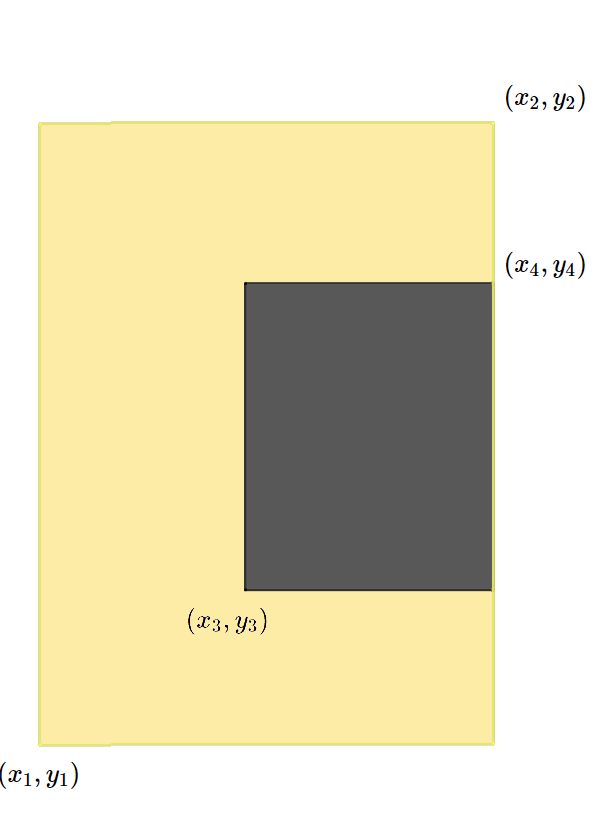
- L — прямоугольник из горящих диодов с углами (x1,y1) и (x2,y2), внутри которого есть прямоугольник из выключенных диодов с координатами углов (x3,y3) и (x4,y4). При этом правые верхние углы выключенного прямоугольника и внешнего прямоугольника совпадают, то есть x1<x3<x4=x2 и y1<y3<y4=y2
- H — прямоугольник из горящих диодов с углами (x1,y1) и (x2,y2), внутри которого находятся 2 прямоугольника из выключенных диодов с координатами углов (x3,y3) и (x4,y4) у первого и (x5,y5) и (x6,y6) у второго. При этом выключенные прямоугольники должны иметь одинаковую ширину, находиться строго один под другим, один прямоугольник должен касаться верхней стороны, а другой прямоугольник должен касаться нижней стороны внешнего прямоугольника, то есть x1<x3=x5<x4=x6<x2 и y1=y3<y4<y5<y6=y2
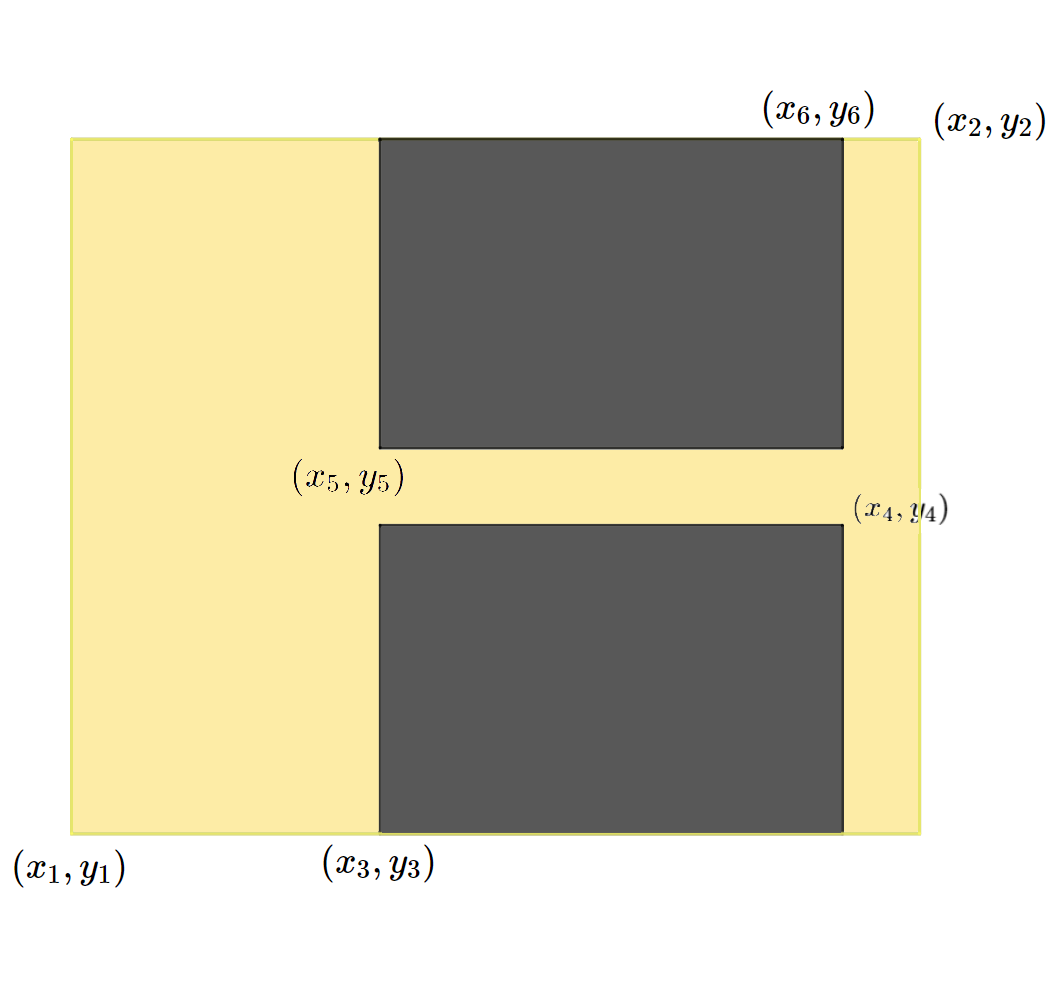
- P — прямоугольник из горящих диодов с углами (x1,y1) и (x2,y2), внутри которого находятся 2 прямоугольника из выключенных диодов с координатами углов (x3,y3) и (x4,y4) у первого и (x5,y5) и (x6,y6) у второго. При этом правый нижний угол первого выключенного прямоугольника должен совпадать с правым нижним углом внешнего прямоугольника, а другой выключенный прямоугольник должен находиться строго выше и не касаться границ других прямоугольников, также левые границы двух выключенных прямоугольников должны совпадать, то есть x1<x3=x5<x6<x4=x2 и y1=y3<y4<y5<y6<y2
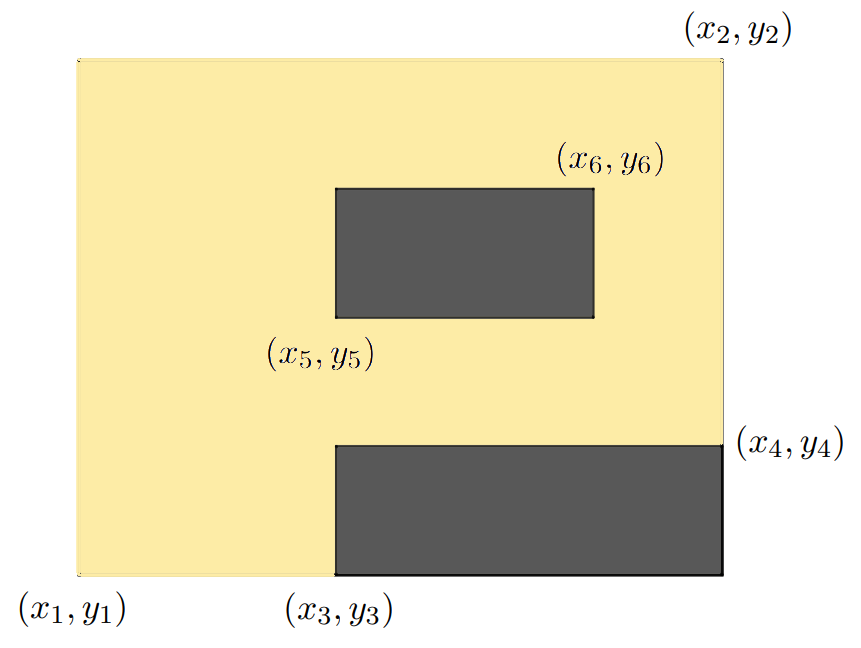

Любое другое состояние табло считается буквой X.

По виду табло определите, какая буква на нём изображена.

<b>Формат ввода</b>

В первой строке входных данных находится одно число 1≤n≤10) — сторона табло.

В следующих n строках находятся строки длины n из символов «.» и «#» — строки таблицы. «.» обозначает выключенный квадратный диод табло, а «#» — горящий.

<b>Формат вывода</b>

Программа должна вывести единственный символ: если данная таблица подходит под одно из описаний букв I, O, C, L, H, P, то выведите её (все буквы — английские). Если же данная таблица не подходит ни под какие условия, то выведите X.

<b>Пример</b>

Ввод:<br>
4<br>
.##.<br>
.##.<br>
.##.<br>
....<br>
Вывод:<br>
I

In [ ]:
# n = int(input())
# matrix = [[input().strip()] for _ in range(n)]


min_y = n+1
max_y = -1
min_x = n+1
max_x = -1

for y in range(n):
    for x in range(n):
        if matrix[y][0][x] == '#':
            min_y = min(min_y,y)
            min_x = min(min_x,x)
            max_y = max(max_y,y)
            max_x = max(max_x,x)

list_x = set()
list_y = set()
extr_x = []
extr_y = []
for y in range(min_y, max_y+1):
    if '.' in matrix[y][0][min_x: max_x+1]:
        list_y.add(y)
        for x in range(min_x, max_x+1):
            if matrix[y][0][x] == '.':
                list_x.add(x)
    elif not '.' in matrix[y][0][min_x: max_x+1] and len(list_x) != 0:
        extr_x.append([min(list_x), max(list_x)])
        extr_y.append([min(list_y), max(list_y)])
        list_x = set()
        list_y = set()
if len(list_x)>0:
    extr_x.append([min(list_x), max(list_x)])
    extr_y.append([min(list_y), max(list_y)])

B = True
for i in range(len(extr_x)):
    for y in range(min_y, max_y+1):
        for x in range(min_x, max_x+1):
            if not (x in range(extr_x[i][0], extr_x[i][1]+1)) and (y in range(extr_y[i][0], extr_y[i][1]+1)):
                if matrix[y][0][x] != '#':
                    B = False

for i in range(len(extr_x)):
    for y in range(min_y, max_y+1):
        for x in range(min_x, max_x+1):
            if (x in range(extr_x[i][0], extr_x[i][1]+1)) and (y in range(extr_y[i][0], extr_y[i][1]+1)):
                if matrix[y][0][x] != '.':
                    B = False

if min_x>n:
    print('X')

elif len(extr_x) == 0 and B:
    if max_x - min_x <= max_y - min_y:
        print('I')

elif len(extr_x) == 1 and B:
    if min_x < extr_x[0][0] and min_y < extr_y[0][0] and extr_x[0][1] < max_x and extr_y[0][1] < max_y:
        print('O')
    elif min_x < extr_x[0][0] and min_y < extr_y[0][0] and extr_x[0][1] == max_x and extr_y[0][1] < max_y:
        print('C')
    elif min_x < extr_x[0][0] and min_y == extr_y[0][0] and extr_x[0][1] == max_x and extr_y[0][1] < max_y:
        print('L')
    else:
        print('X')
        
elif len(extr_x) == 2 and B:
    if extr_x[0][0] == extr_x[1][0] and extr_x[0][1] == extr_x[1][1] and extr_y[0][0] == min_y and extr_y[0][1] <  extr_y[1][0] and  extr_y[1][1] == max_y:
        print('H')
    elif extr_x[0][0] == extr_x[1][0] and extr_x[0][1] < max_x and extr_x[0][0] > min_x and extr_x[1][1] == max_x and extr_y[0][0] > min_y and extr_y[0][1] < extr_y[1][0]and extr_y[1][1] == max_y:
        print('P')
    else:
        print('X')

else:
    print('X')